In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline

## Dataset Description
#### Type: Timeseries, Multivariate

The dataset consist on the reading of 14 temperature modulated mox sensors.
Each experiment consists of 100 measurements: 10 experimental mixtures uniformly distributed in the range of 0 - 20 ppm and 10 replicates per concentration.

At the beggining of each experiment the gas chamber is cleaned by 15 mins using a stream of 240 mln/min. And after that the gas mixtures are released at 240mln/min, thus assuming the flow rate is constant.

A single experiment lasted 25 hours (100 samples x 15 minutes / sample) and was replicated on 13 working days spanning in total 17 days.


## Data Loading

In [2]:
path = "./dataset_tempMod_CO_RH"

# I get a list of the filenames for later use in a for loop.
# Then they get sorted by name and the last file which is the Readme.txt gets sliced.
files = sorted(os.listdir(path))[:-1]
files

['20160930_203718.csv',
 '20161001_231809.csv',
 '20161003_085624.csv',
 '20161004_104124.csv',
 '20161005_140846.csv',
 '20161006_182224.csv',
 '20161007_210049.csv',
 '20161008_234508.csv',
 '20161010_095046.csv',
 '20161011_113032.csv',
 '20161013_143355.csv',
 '20161014_184659.csv',
 '20161016_053656.csv']

In [3]:
# Here I load the first csv as a exploratory dataset.
df_list = []

for i in files[:]:
    try:
        ptf = path + "/" + i
        temp_df = pd.read_csv(ptf)
        df_list.append(temp_df.iloc[:,:20])
        #current_df = pd.read_csv(ptf)
        #df = pd.concat([df, pd.read_csv(ptf)], axis=0)
       
        print(ptf + " " + "loaded")
    except:
        print(ptf + " not loaded")
 
df = pd.concat(df_list, axis=0)

./dataset_tempMod_CO_RH/20160930_203718.csv loaded
./dataset_tempMod_CO_RH/20161001_231809.csv loaded
./dataset_tempMod_CO_RH/20161003_085624.csv loaded
./dataset_tempMod_CO_RH/20161004_104124.csv loaded
./dataset_tempMod_CO_RH/20161005_140846.csv loaded
./dataset_tempMod_CO_RH/20161006_182224.csv loaded
./dataset_tempMod_CO_RH/20161007_210049.csv loaded
./dataset_tempMod_CO_RH/20161008_234508.csv loaded
./dataset_tempMod_CO_RH/20161010_095046.csv loaded
./dataset_tempMod_CO_RH/20161011_113032.csv loaded
./dataset_tempMod_CO_RH/20161013_143355.csv loaded
./dataset_tempMod_CO_RH/20161014_184659.csv loaded
./dataset_tempMod_CO_RH/20161016_053656.csv loaded


In [4]:
df.head(10)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.309,0.0,55.84,26.62,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
1,0.618,0.0,55.84,26.62,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
2,0.926,0.0,55.84,26.62,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
3,1.234,0.0,55.84,26.62,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
4,1.544,0.0,55.84,26.62,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,72.9643,83.1477,80.5302,58.0412,39.2482,65.0981,67.8697,63.5316,50.3730,63.3641
5,1.854,0.0,55.84,26.62,240.7602,0.2010,64.1020,74.3444,76.4748,28.1797,72.4181,78.4368,79.0768,59.7614,40.4067,64.1416,61.6173,60.5007,50.6424,66.2847
6,2.163,0.0,55.84,26.62,240.6845,0.2009,62.6869,71.3877,73.8965,27.6523,64.4007,69.7912,72.5239,55.6363,39.6271,62.7987,65.8307,56.5195,50.3730,64.3090
7,2.472,0.0,55.84,26.62,240.6624,0.2009,54.8336,67.0368,69.2228,27.4429,64.9211,63.9055,63.5872,54.0730,40.5881,64.1416,63.9090,53.0811,48.9146,63.3641
8,2.781,0.0,55.84,26.62,240.6519,0.2003,51.2600,64.5303,61.4312,25.6881,54.7235,57.2118,59.6255,55.6363,40.9928,61.9071,60.3791,52.7888,48.3640,62.4461
9,3.090,0.0,55.84,26.62,240.6414,0.2000,44.4420,54.4606,58.1498,25.4084,53.6815,54.5217,56.1218,60.6597,40.8079,58.9374,54.2965,51.5393,49.4775,64.8363


## Data structure and NA values
Now we are going to check the df memory usage and formats and the presence of NaN values in each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843147 entries, 0 to 295615
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time (s)            float64
 1   CO (ppm)            float64
 2   Humidity (%r.h.)    float64
 3   Temperature (C)     float64
 4   Flow rate (mL/min)  float64
 5   Heater voltage (V)  float64
 6   R1 (MOhm)           float64
 7   R2 (MOhm)           float64
 8   R3 (MOhm)           float64
 9   R4 (MOhm)           float64
 10  R5 (MOhm)           float64
 11  R6 (MOhm)           float64
 12  R7 (MOhm)           float64
 13  R8 (MOhm)           float64
 14  R9 (MOhm)           float64
 15  R10 (MOhm)          float64
 16  R11 (MOhm)          float64
 17  R12 (MOhm)          float64
 18  R13 (MOhm)          float64
 19  R14 (MOhm)          float64
dtypes: float64(20)
memory usage: 615.7 MB


In [6]:
pd.set_option('display.max_rows',None)
df.isna().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64

In [7]:
df = df.iloc[:,:20]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843147 entries, 0 to 295615
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time (s)            float64
 1   CO (ppm)            float64
 2   Humidity (%r.h.)    float64
 3   Temperature (C)     float64
 4   Flow rate (mL/min)  float64
 5   Heater voltage (V)  float64
 6   R1 (MOhm)           float64
 7   R2 (MOhm)           float64
 8   R3 (MOhm)           float64
 9   R4 (MOhm)           float64
 10  R5 (MOhm)           float64
 11  R6 (MOhm)           float64
 12  R7 (MOhm)           float64
 13  R8 (MOhm)           float64
 14  R9 (MOhm)           float64
 15  R10 (MOhm)          float64
 16  R11 (MOhm)          float64
 17  R12 (MOhm)          float64
 18  R13 (MOhm)          float64
 19  R14 (MOhm)          float64
dtypes: float64(20)
memory usage: 615.7 MB


In [8]:
fcols = df.select_dtypes('float').columns
df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843147 entries, 0 to 295615
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time (s)            float32
 1   CO (ppm)            float32
 2   Humidity (%r.h.)    float32
 3   Temperature (C)     float32
 4   Flow rate (mL/min)  float32
 5   Heater voltage (V)  float32
 6   R1 (MOhm)           float32
 7   R2 (MOhm)           float32
 8   R3 (MOhm)           float32
 9   R4 (MOhm)           float32
 10  R5 (MOhm)           float32
 11  R6 (MOhm)           float32
 12  R7 (MOhm)           float32
 13  R8 (MOhm)           float32
 14  R9 (MOhm)           float32
 15  R10 (MOhm)          float32
 16  R11 (MOhm)          float32
 17  R12 (MOhm)          float32
 18  R13 (MOhm)          float32
 19  R14 (MOhm)          float32
dtypes: float32(20)
memory usage: 322.5 MB


In [9]:
df = df.sort_values(by='Time (s)')

## Dataset Description


In [10]:
#Set option to display float format instead of scientific notation.
pd.set_option('float_format', '{:f}'.format)
df.describe()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000,3843147.000000
mean,45152.031250,9.781740,45.812206,25.285254,245.695343,0.355166,16.312542,18.323322,22.909464,21.415234,32.577518,29.512119,32.785526,27.966908,23.660728,26.148024,28.300432,26.276863,23.246061,29.144068
std,26204.609375,6.441856,12.440928,1.033631,6.009772,0.292910,23.923416,27.499020,29.219646,17.751238,27.735205,27.648975,28.099825,20.515413,18.721308,20.879921,21.047665,19.298054,17.972383,22.667700
min,0.307000,0.000000,16.340000,13.799800,0.000000,0.198000,0.031500,0.054800,0.051000,0.029700,0.044900,0.046400,0.049400,0.031000,0.028900,0.036000,0.030500,0.032700,0.032100,0.031300
25%,22727.442383,4.440000,36.570000,25.180000,239.896500,0.200000,0.410900,0.488200,0.588800,1.990900,1.802400,1.545600,1.890500,11.914500,7.988600,7.802200,10.678400,9.817900,7.825300,9.804800
50%,45452.972656,8.890000,47.090000,26.020000,239.972107,0.200000,1.974300,1.516000,4.621600,21.715599,34.279202,24.348900,33.389198,27.840500,21.993900,23.997400,27.823000,26.400400,22.049700,27.402700
75%,68176.984375,15.560000,55.759998,26.379999,240.044205,0.207000,28.860100,32.629902,46.836102,34.592300,53.382401,50.836899,54.023102,42.367901,36.277802,40.817402,43.218899,40.463299,35.952900,45.504902
max,90910.132812,20.000000,83.809998,27.420000,321.209290,0.902600,128.019501,199.810501,222.991898,112.086304,213.230103,191.451797,228.779404,124.771797,115.106903,148.556793,125.989098,129.926102,98.209503,129.421997


From the R1 to R14 sensor descriptions, we can appreciate that the max values are far from the 75% quartile, thus we can assume there's presence of outliers.

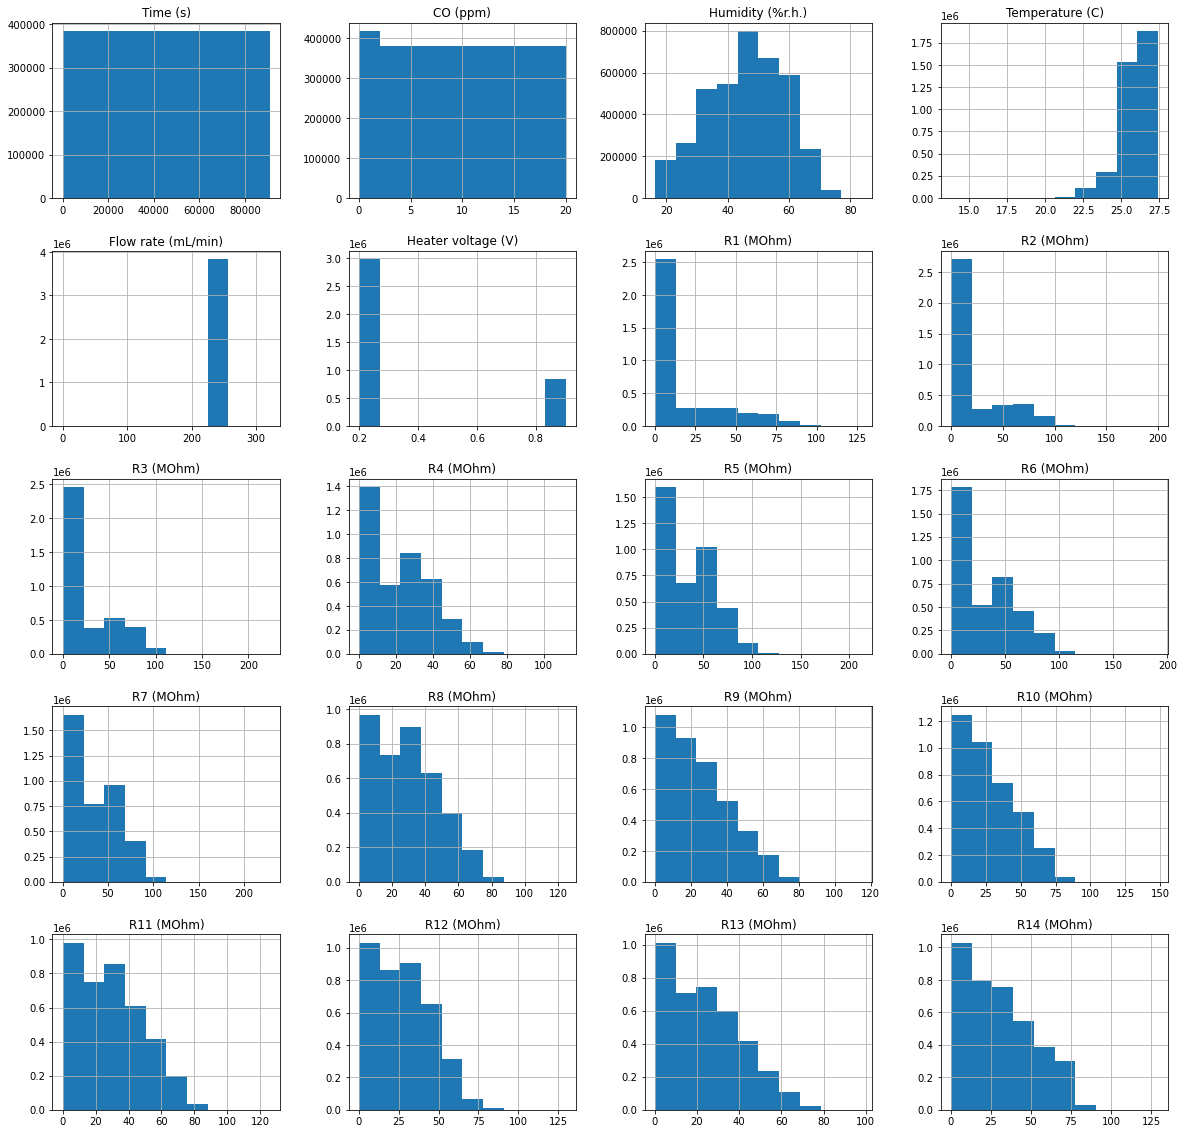

In [11]:
df.hist(figsize=(20,20));#;

From the previous distribution charts we can see that the data tends to be left-skewed

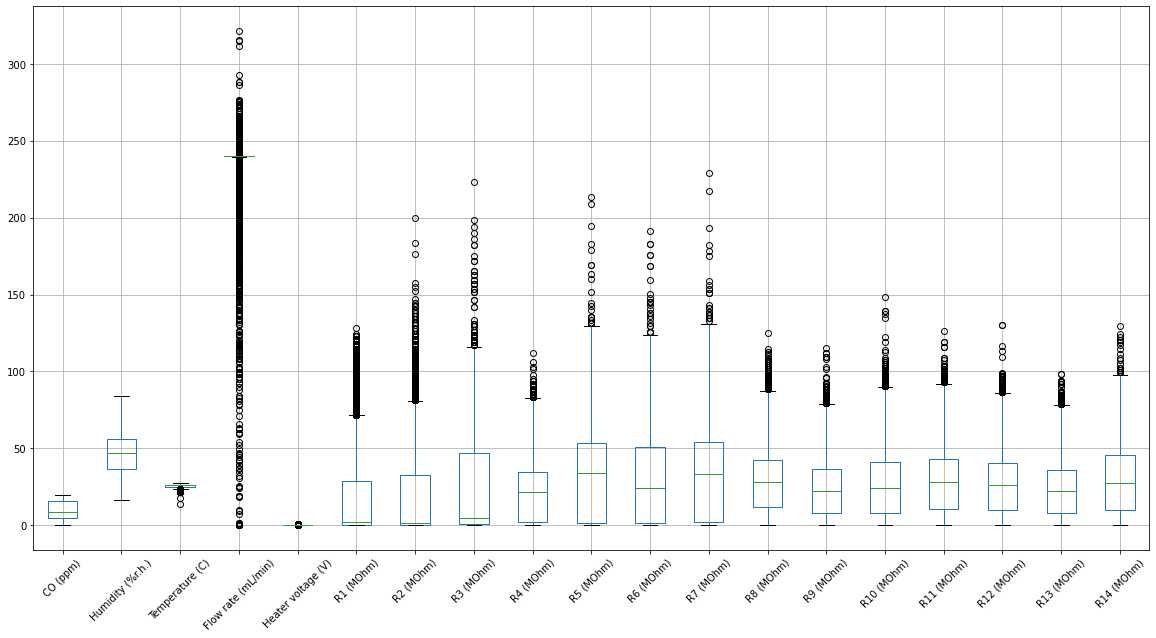

In [12]:
df.iloc[:,1:].boxplot(figsize=(20,10));#;
plt.xticks(rotation=45);#;

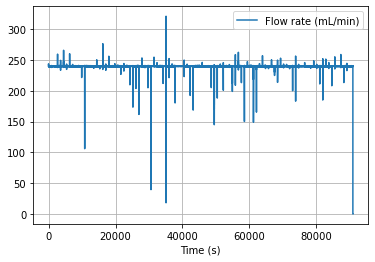

In [13]:
df.plot('Time (s)', 'Flow rate (mL/min)')
plt.grid()

Presence of outliers in the flow rate data, probably due to instrumental noise.

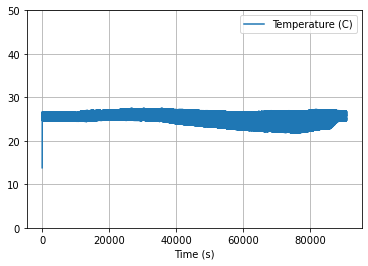

In [14]:
df.plot('Time (s)', 'Temperature (C)')
plt.ylim([0,50])
plt.grid()

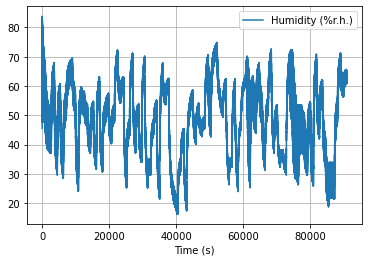

In [15]:
df.plot('Time (s)', 'Humidity (%r.h.)')
#plt.xlim([0,15000])
plt.grid()

In [16]:
df['Time (s)'] = pd.to_timedelta(df['Time (s)'], unit='sec')
df.head(10)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0 days 00:00:00.307000011,0.000000,45.569901,13.799800,240.802902,0.895000,0.078600,0.128600,0.101900,0.093200,0.105100,0.112900,0.112800,0.090500,0.095800,0.110300,0.104300,0.102500,0.094200,0.102000
0,0 days 00:00:00.307999998,0.000000,48.139999,26.059999,242.775406,0.899000,0.200200,0.573600,0.940900,0.738000,1.133800,1.315100,1.854800,1.002100,1.041200,1.455900,2.675000,4.396200,5.989800,7.524900
0,0 days 00:00:00.307999998,0.000000,48.680000,26.299999,242.237198,0.200000,2.049300,1.416800,5.079900,26.335300,42.185799,34.454899,40.559502,52.344601,44.320702,57.728901,62.094700,50.346600,47.584599,64.836304
0,0 days 00:00:00.307999998,0.000000,52.189999,25.780001,241.319107,0.411900,0.310200,0.834600,1.370500,0.985500,1.495000,1.695400,2.412600,1.667100,1.841400,2.313700,3.832100,6.208900,7.317000,9.353700
0,0 days 00:00:00.307999998,0.000000,57.709999,25.740000,242.044998,0.199200,0.742200,0.729600,1.318400,14.419800,22.706499,11.686500,19.785801,46.298599,37.455299,45.358299,53.627499,42.228298,39.081100,53.476299
0,0 days 00:00:00.308999985,0.000000,55.840000,26.620001,241.632294,0.211200,2.131400,5.355200,9.756900,6.318800,9.447200,10.576900,13.631700,21.982901,16.190201,24.278000,31.101400,34.719299,31.750500,41.916698
0,0 days 00:00:00.308999985,0.000000,49.750000,26.620001,242.105804,0.200000,0.465200,0.540800,0.729100,4.824600,5.766100,3.197400,4.837500,44.247898,36.277802,43.524399,46.701500,41.237598,36.092098,51.546200
0,0 days 00:00:00.308999985,0.000000,48.470001,24.620001,243.828201,0.199800,0.664900,0.697600,1.151400,15.286300,22.460501,10.376400,18.568600,53.035500,48.478901,52.814301,62.498001,50.346600,49.790001,63.364101
0,0 days 00:00:00.308999985,0.000000,50.250000,26.540001,242.003906,0.892800,0.071000,0.143600,0.105900,0.101300,0.108100,0.128500,0.116600,0.110300,0.101700,0.122300,0.113900,0.116600,0.106800,0.111000
0,0 days 00:00:00.310000002,0.000000,62.436600,25.436399,242.079102,0.200000,53.489799,64.101997,66.083199,38.185299,65.361099,62.931099,62.671799,60.166401,62.270599,70.335602,69.432503,57.672501,54.861599,68.383698


In [18]:
df.set_index('Time (s)', inplace=True)
resampled = df.resample('15T', label='right').mean()
resampled.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
0 days 00:00:00.307000011,0.083925,51.697781,25.994883,239.994965,0.355165,12.423862,13.943676,18.031708,18.427723,29.202080,25.823917,28.807468,42.780716,37.218178,44.391045,45.882202,39.708286,36.975731,49.520805
0 days 00:15:00.307000011,19.981524,43.308456,25.961191,239.978500,0.355186,11.821769,13.730876,16.725800,16.280624,22.498945,20.657116,22.766581,15.944090,12.739906,13.215048,16.215107,14.355878,11.489561,15.472249
0 days 00:30:00.307000011,15.578231,39.698936,25.963045,239.978165,0.354991,13.125909,15.524487,19.090626,19.308432,26.353456,24.035820,26.459370,16.660128,12.480042,13.778781,16.747904,15.125200,12.680801,15.785931
0 days 00:45:00.307000011,19.935156,54.682224,26.031292,239.973053,0.355036,13.401860,15.713823,19.100470,15.963545,25.085535,23.576155,25.716373,14.729461,10.975787,11.805911,14.624558,13.020988,10.613602,13.548494
0 days 01:00:00.307000011,4.486161,38.910854,25.978081,240.020782,0.355109,14.012707,15.840197,20.386257,22.084419,31.780453,27.822737,31.558546,32.149899,26.867599,31.580431,33.270477,30.443537,28.121920,34.932671


In [19]:
resampled = resampled.reset_index()
resampled.head()
#resampled['Time (s)'] = [x.seconds for x in resampled['Time (s)']]

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0 days 00:00:00.307000011,0.083925,51.697781,25.994883,239.994965,0.355165,12.423862,13.943676,18.031708,18.427723,29.202080,25.823917,28.807468,42.780716,37.218178,44.391045,45.882202,39.708286,36.975731,49.520805
1,0 days 00:15:00.307000011,19.981524,43.308456,25.961191,239.978500,0.355186,11.821769,13.730876,16.725800,16.280624,22.498945,20.657116,22.766581,15.944090,12.739906,13.215048,16.215107,14.355878,11.489561,15.472249
2,0 days 00:30:00.307000011,15.578231,39.698936,25.963045,239.978165,0.354991,13.125909,15.524487,19.090626,19.308432,26.353456,24.035820,26.459370,16.660128,12.480042,13.778781,16.747904,15.125200,12.680801,15.785931
3,0 days 00:45:00.307000011,19.935156,54.682224,26.031292,239.973053,0.355036,13.401860,15.713823,19.100470,15.963545,25.085535,23.576155,25.716373,14.729461,10.975787,11.805911,14.624558,13.020988,10.613602,13.548494
4,0 days 01:00:00.307000011,4.486161,38.910854,25.978081,240.020782,0.355109,14.012707,15.840197,20.386257,22.084419,31.780453,27.822737,31.558546,32.149899,26.867599,31.580431,33.270477,30.443537,28.121920,34.932671


In [20]:
resampled['Time (s)'] = [x.seconds for x in resampled['Time (s)']]


In [21]:
resampled.head(10)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0,0.083925,51.697781,25.994883,239.994965,0.355165,12.423862,13.943676,18.031708,18.427723,29.202080,25.823917,28.807468,42.780716,37.218178,44.391045,45.882202,39.708286,36.975731,49.520805
1,900,19.981524,43.308456,25.961191,239.978500,0.355186,11.821769,13.730876,16.725800,16.280624,22.498945,20.657116,22.766581,15.944090,12.739906,13.215048,16.215107,14.355878,11.489561,15.472249
2,1800,15.578231,39.698936,25.963045,239.978165,0.354991,13.125909,15.524487,19.090626,19.308432,26.353456,24.035820,26.459370,16.660128,12.480042,13.778781,16.747904,15.125200,12.680801,15.785931
3,2700,19.935156,54.682224,26.031292,239.973053,0.355036,13.401860,15.713823,19.100470,15.963545,25.085535,23.576155,25.716373,14.729461,10.975787,11.805911,14.624558,13.020988,10.613602,13.548494
4,3600,4.486161,38.910854,25.978081,240.020782,0.355109,14.012707,15.840197,20.386257,22.084419,31.780453,27.822737,31.558546,32.149899,26.867599,31.580431,33.270477,30.443537,28.121920,34.932671
5,4500,15.523270,48.292084,25.959393,239.960022,0.355218,14.584463,16.907410,21.165770,19.510170,29.374096,26.693113,29.753214,19.826378,15.822017,17.125101,19.795652,18.157856,15.336037,19.304253
6,5400,6.649008,35.924461,25.876444,239.988358,0.355448,15.475824,17.634037,22.708799,24.456062,34.468143,30.495501,34.415970,29.445549,24.780622,28.281689,30.057608,28.085430,25.650156,31.219885
7,6300,2.261345,46.403881,25.873060,239.912964,0.354977,17.644331,20.081774,26.534554,25.639393,40.701324,37.047913,40.559418,39.829399,35.640999,39.825771,41.326988,37.311718,35.729027,43.885284
8,7200,11.077587,58.274029,25.898489,239.950409,0.355055,15.125044,16.689308,21.093704,17.574680,30.225344,27.671661,30.924332,25.957401,21.762365,24.174118,26.320986,24.670815,21.046604,26.714876
9,8100,2.260310,62.417839,25.887337,239.980743,0.354982,13.323577,14.491895,18.521696,15.335196,28.472656,25.727001,29.036896,37.066479,31.299074,37.893452,39.408714,35.320454,30.697590,41.807602


In [22]:
resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time (s)            102 non-null    int64  
 1   CO (ppm)            102 non-null    float32
 2   Humidity (%r.h.)    102 non-null    float32
 3   Temperature (C)     102 non-null    float32
 4   Flow rate (mL/min)  102 non-null    float32
 5   Heater voltage (V)  102 non-null    float32
 6   R1 (MOhm)           102 non-null    float32
 7   R2 (MOhm)           102 non-null    float32
 8   R3 (MOhm)           102 non-null    float32
 9   R4 (MOhm)           102 non-null    float32
 10  R5 (MOhm)           102 non-null    float32
 11  R6 (MOhm)           102 non-null    float32
 12  R7 (MOhm)           102 non-null    float32
 13  R8 (MOhm)           102 non-null    float32
 14  R9 (MOhm)           102 non-null    float32
 15  R10 (MOhm)          102 non-null    float32
 16  R11 (MOh

<AxesSubplot:xlabel='Time (s)'>

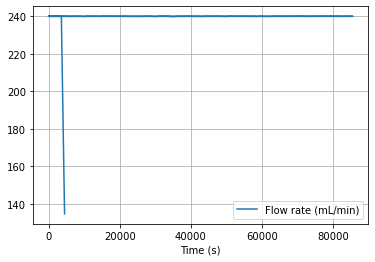

In [23]:
resampled.plot('Time (s)', 'Flow rate (mL/min)', grid=True)

In [29]:
resampled.columns

Index(['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
       'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)',
       'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)'],
      dtype='object')

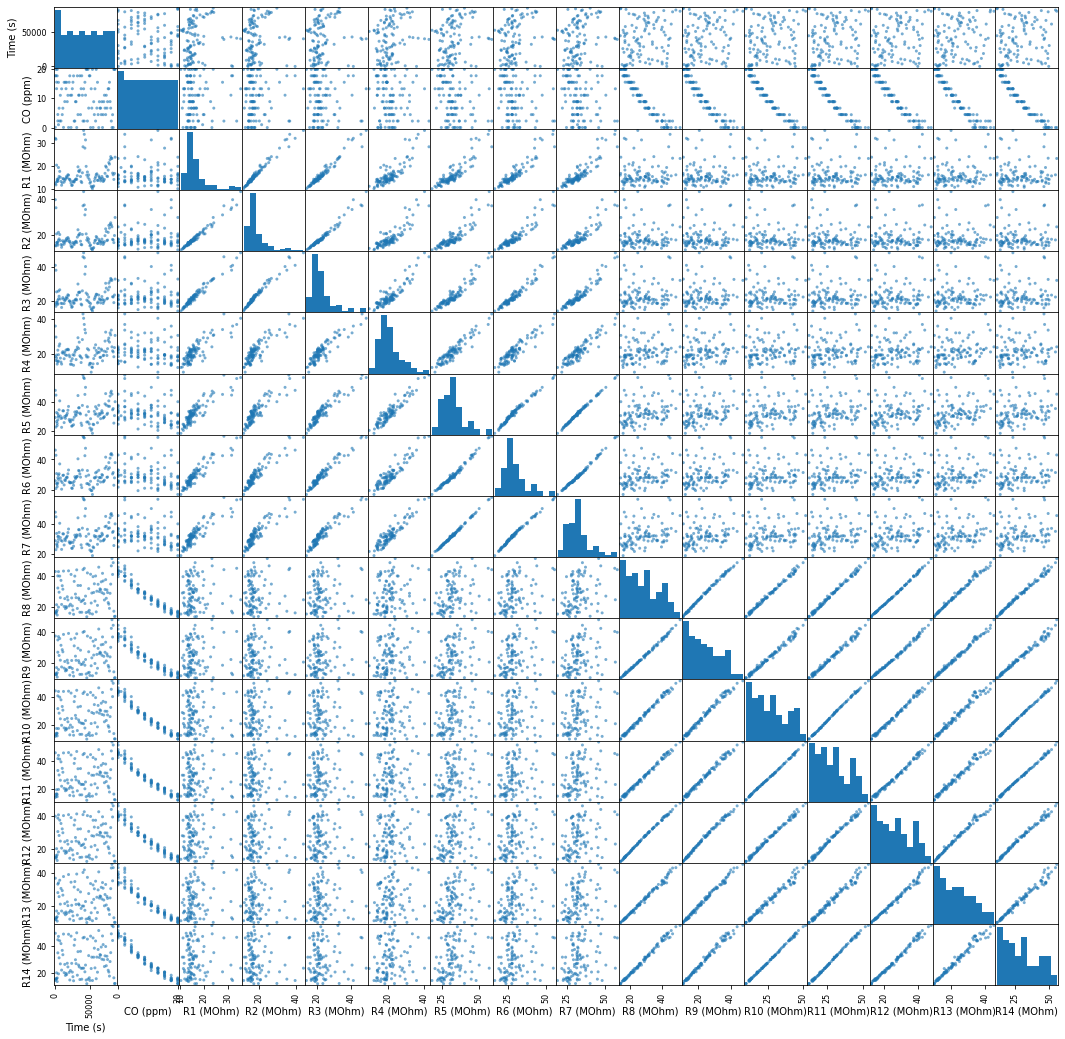

In [32]:
columns = ['Time (s)', 'CO (ppm)', 'R1 (MOhm)', 'R2 (MOhm)',
       'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)']
#resampled.columns
pd.plotting.scatter_matrix(resampled[columns], alpha=0.6, figsize=(18,18));#;

## Data Pre-processing.

And the boxplot chart shows that there's presence of outliers in the sensor readings.

In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer